In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('births.csv')
df.head(3887)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
3882,1974,1,28.0,M,4399
3883,1974,1,29.0,F,4349
3884,1974,1,29.0,M,4562
3885,1974,1,30.0,F,4072


In [3]:
df['day'].fillna(0, inplace = True) #fills with value 0 where theres na
df['day'] = df['day'].astype(int) #converts the column from float to int
df.head(3863)

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
3858,1974,1,16,M,4586
3859,1974,1,17,F,4276
3860,1974,1,17,M,4328
3861,1974,1,18,F,4489


In [4]:
df['decade'] = 10 * (df['year']//10) #Converts the years to the their respective decade
#i.e. if it devides the year 1969 by 10 then it converts it to its near full integer
#with help of // function hence it becomes 1960.

In [5]:
df.pivot_table('births' ,index = 'decade', columns = 'gender', aggfunc = 'sum')
#creates dataframe table
#We can specify which column we need 
#aggfunc mean aggregrate function which decides which function to use to get sum or mean of data in column

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


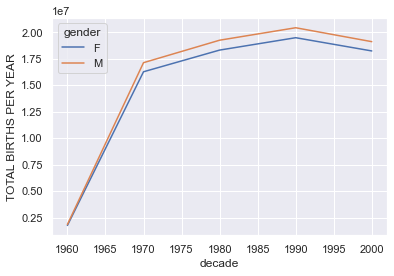

In [6]:
import seaborn as sns
sns.set()
birth_decade = df.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
birth_decade.plot()
plt.ylabel('TOTAL BIRTHS PER YEAR')
plt.show()   #No of births by decade

In [7]:
quartiles = np.quantile(df['births'], [0.25,0.50,0.75])
print(quartiles)

[4358.  4814.  5289.5]


<AxesSubplot:title={'center':'year'}, xlabel='gender'>

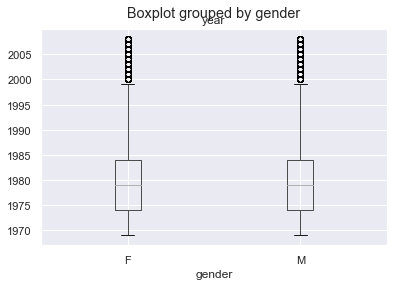

In [8]:
df.boxplot(by = 'gender', column = 'year', grid = True)

In [9]:
dt = df.sort_values('births', axis = 0, ascending = True, inplace = True, na_position = 'last')
print(df)

       year  month  day gender  births  decade
12184  1985      1   99      F       1    1980
14944  1988     10   99      M       1    1980
9500   1981      6   99      F       1    1980
9439   1981      5   99      F       1    1980
12613  1985      8   99      F       1    1980
...     ...    ...  ...    ...     ...     ...
15492  2006      9    0      M  191866    2000
15536  2008      7    0      M  192714    2000
15512  2007      7    0      M  195135    2000
15490  2006      8    0      M  198942    2000
15514  2007      8    0      M  199622    2000

[15547 rows x 6 columns]


In [10]:
mu = quartiles[1]
print(mu)

4814.0


In [11]:
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sig)

689.31


In [12]:
births = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
print(births)

       year  month  day gender  births  decade
3309   1973      4   29      F    3249    1970
5624   1976      5    9      F    3273    1970
3827   1974      1    1      F    3311    1970
5652   1976      5   23      F    3316    1970
5593   1976      4   25      F    3320    1970
...     ...    ...  ...    ...     ...     ...
14839  1988      9    9      M    6474    1980
1323   1970      9   22      M    6480    1970
14867  1988      9   23      M    6482    1980
14861  1988      9   20      M    6519    1980
14711  1988      7    7      M    6527    1980

[14610 rows x 6 columns]


In [21]:
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births['dayofweek'].head(50)

<ipython-input-21-e7c54263bbbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)
<ipython-input-21-e7c54263bbbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


1973-04-29    6
1976-05-09    6
1974-01-01    1
1976-05-23    6
1976-04-25    6
1973-04-22    6
1974-05-05    6
1974-05-19    6
1976-05-02    6
1973-05-06    6
1974-12-25    2
1973-12-23    6
1974-04-07    6
1976-05-09    6
1975-03-30    6
1972-12-24    6
1975-12-25    3
1974-06-02    6
1974-04-28    6
1974-05-12    6
1978-04-23    6
1974-06-09    6
1974-12-25    2
1973-05-13    6
1975-04-20    6
1976-04-18    6
1974-06-23    6
1975-04-13    6
1974-02-10    6
1975-06-29    6
1976-04-11    6
1973-11-22    3
1974-06-16    6
1974-05-26    6
1976-02-15    6
1973-10-21    6
1975-05-18    6
1975-04-06    6
1973-04-15    6
1975-01-01    2
1975-06-01    6
1975-05-11    6
1973-12-25    1
1974-05-26    6
1974-01-06    6
1978-04-30    6
1973-06-03    6
1974-03-24    6
1975-11-02    6
1974-04-14    6
Name: dayofweek, dtype: int64

<ipython-input-17-bfba7eba7e43>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


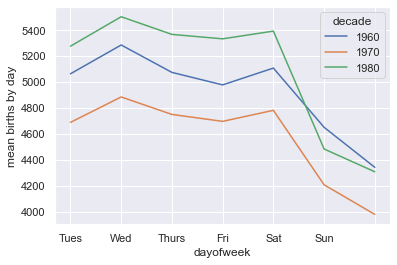

In [17]:
births.pivot_table('births', index = 'dayofweek', 
                  columns = 'decade',aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')
plt.show()

In [37]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


In [38]:
births_month.index = [pd.datetime(2012, month, day)
                     for (month, day) in births_month.index]
print(births_month.head())

              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


<ipython-input-38-60980f1586b4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


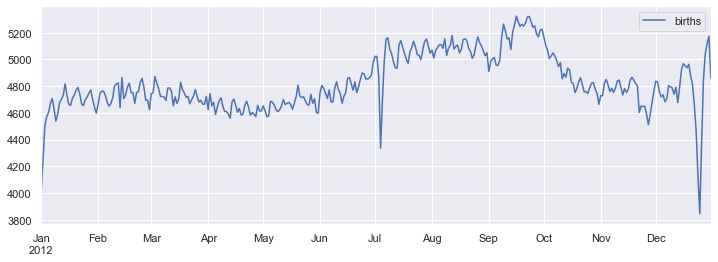

In [39]:
fig, ax = plt.subplots(figsize = (12,4))
births_month.plot(ax = ax)
plt.show()